MASS-SPRING SYSTEM VIBRATION ANALYSIS
This program analyzes natural frequencies and normal modes
of 1D mass-spring systems with fixed ends.

TUTORIAL 1: TWO-MASS SYSTEM WITH FIXED ENDS

1.1 Initial system (equal masses and springs):


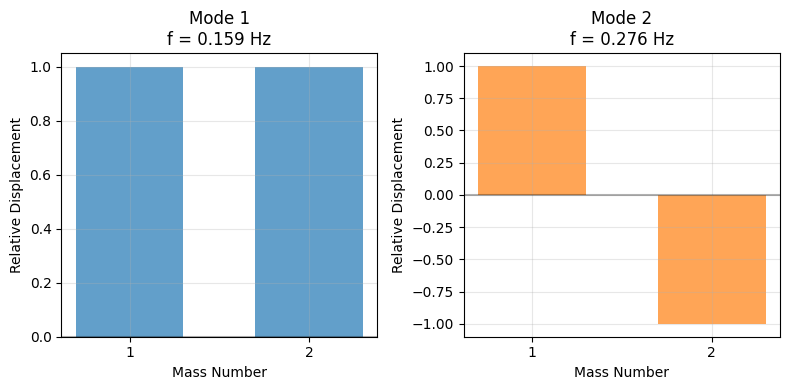

MASS-SPRING SYSTEM ANALYSIS
Masses: [1. 1.] kg
Spring constants: [1. 1. 1.] N/m

NATURAL FREQUENCIES:
------------------------------
Mode 1: 1.0000 rad/s (0.1592 Hz)
Mode 2: 1.7321 rad/s (0.2757 Hz)

NORMAL MODES (relative displacements):
----------------------------------------
Mode 1: [  1.0000   1.0000]
Mode 2: [  1.0000  -1.0000]

1.2 Varying second mass (m2):

m2 = 0.5 kg:
  Mode 1: 0.1792 Hz
  Mode 2: 0.3462 Hz

m2 = 1.0 kg:
  Mode 1: 0.1592 Hz
  Mode 2: 0.2757 Hz

m2 = 2.0 kg:
  Mode 1: 0.1267 Hz
  Mode 2: 0.2448 Hz

m2 = 4.0 kg:
  Mode 1: 0.0940 Hz
  Mode 2: 0.2334 Hz


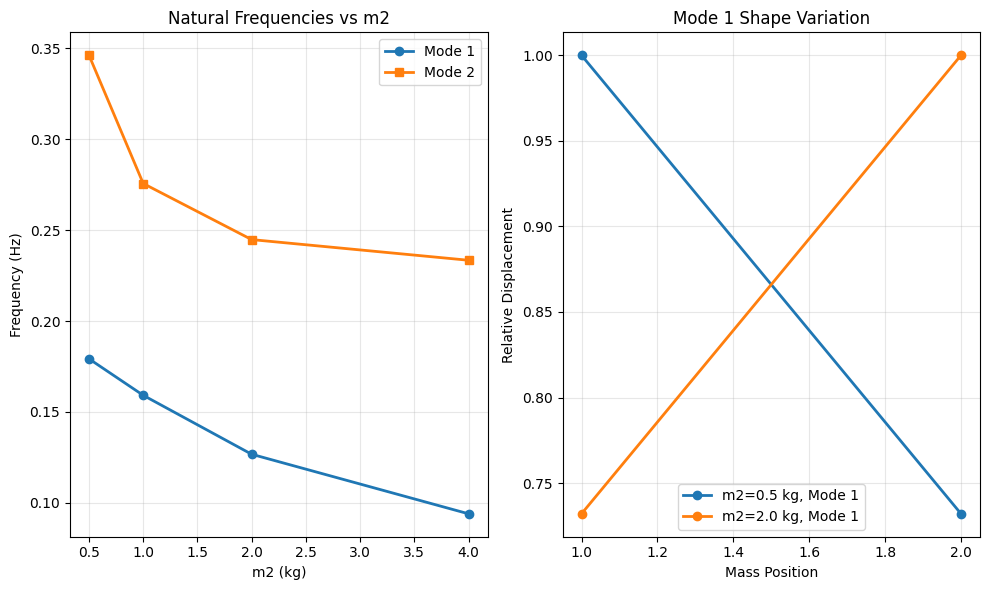


TUTORIAL 2: THREE-MASS SYSTEM WITH FIXED ENDS

2.1 All masses equal:


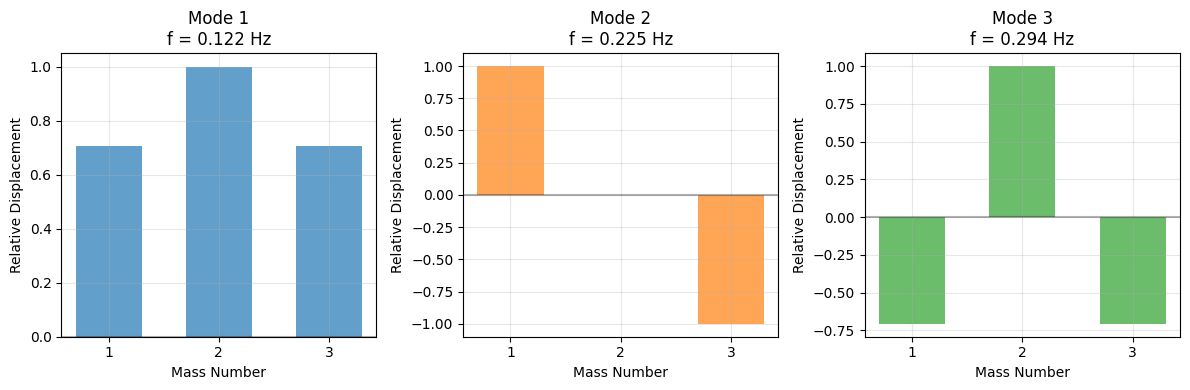

MASS-SPRING SYSTEM ANALYSIS
Masses: [1. 1. 1.] kg
Spring constants: [1. 1. 1. 1.] N/m

NATURAL FREQUENCIES:
------------------------------
Mode 1: 0.7654 rad/s (0.1218 Hz)
Mode 2: 1.4142 rad/s (0.2251 Hz)
Mode 3: 1.8478 rad/s (0.2941 Hz)

NORMAL MODES (relative displacements):
----------------------------------------
Mode 1: [  0.7071   1.0000   0.7071]
Mode 2: [  1.0000  -0.0000  -1.0000]
Mode 3: [ -0.7071   1.0000  -0.7071]

2.2 Middle mass different (m2 = 2.0 kg):


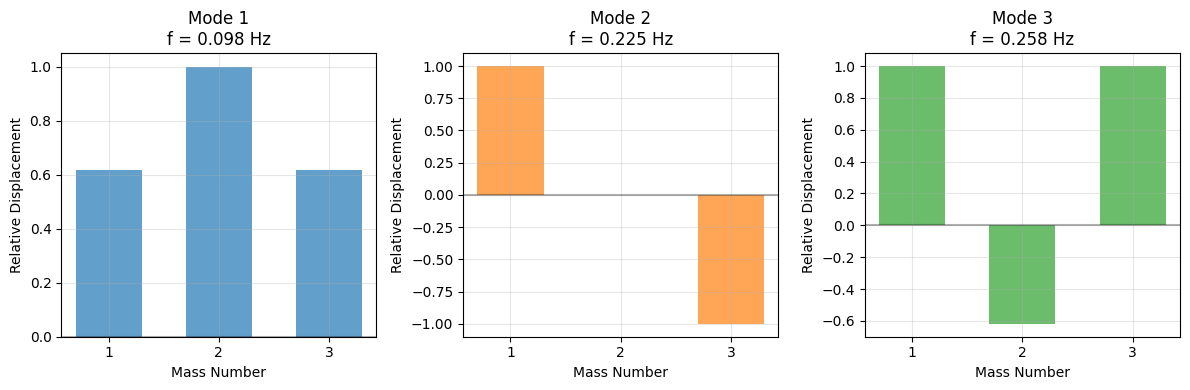

MASS-SPRING SYSTEM ANALYSIS
Masses: [1. 2. 1.] kg
Spring constants: [1. 1. 1. 1.] N/m

NATURAL FREQUENCIES:
------------------------------
Mode 1: 0.6180 rad/s (0.0984 Hz)
Mode 2: 1.4142 rad/s (0.2251 Hz)
Mode 3: 1.6180 rad/s (0.2575 Hz)

NORMAL MODES (relative displacements):
----------------------------------------
Mode 1: [  0.6180   1.0000   0.6180]
Mode 2: [  1.0000  -0.0000  -1.0000]
Mode 3: [  1.0000  -0.6180   1.0000]

2.3 All masses different:


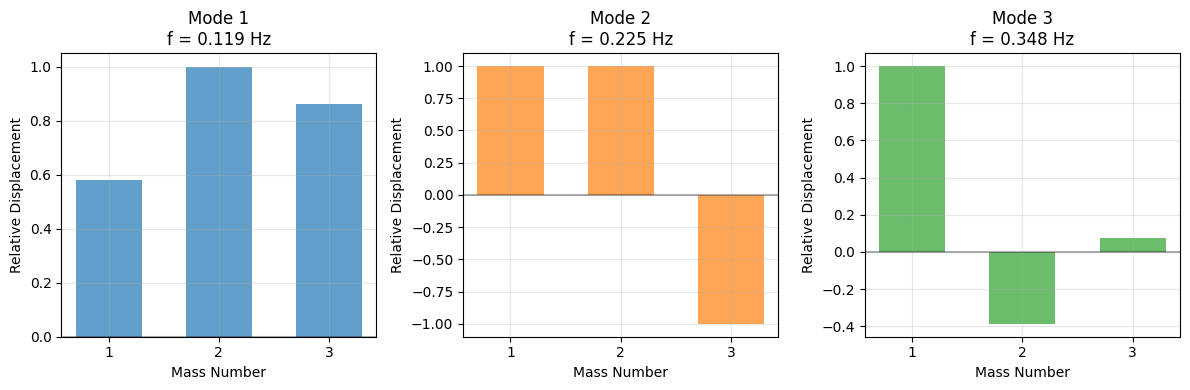

MASS-SPRING SYSTEM ANALYSIS
Masses: [0.5 1.  1.5] kg
Spring constants: [1. 1. 1. 1.] N/m

NATURAL FREQUENCIES:
------------------------------
Mode 1: 0.7473 rad/s (0.1189 Hz)
Mode 2: 1.4142 rad/s (0.2251 Hz)
Mode 3: 2.1851 rad/s (0.3478 Hz)

NORMAL MODES (relative displacements):
----------------------------------------
Mode 1: [  0.5811   1.0000   0.8604]
Mode 2: [  1.0000   1.0000  -1.0000]
Mode 3: [  1.0000  -0.3874   0.0750]


/tmp/ipykernel_5730/2333910712.py:279: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


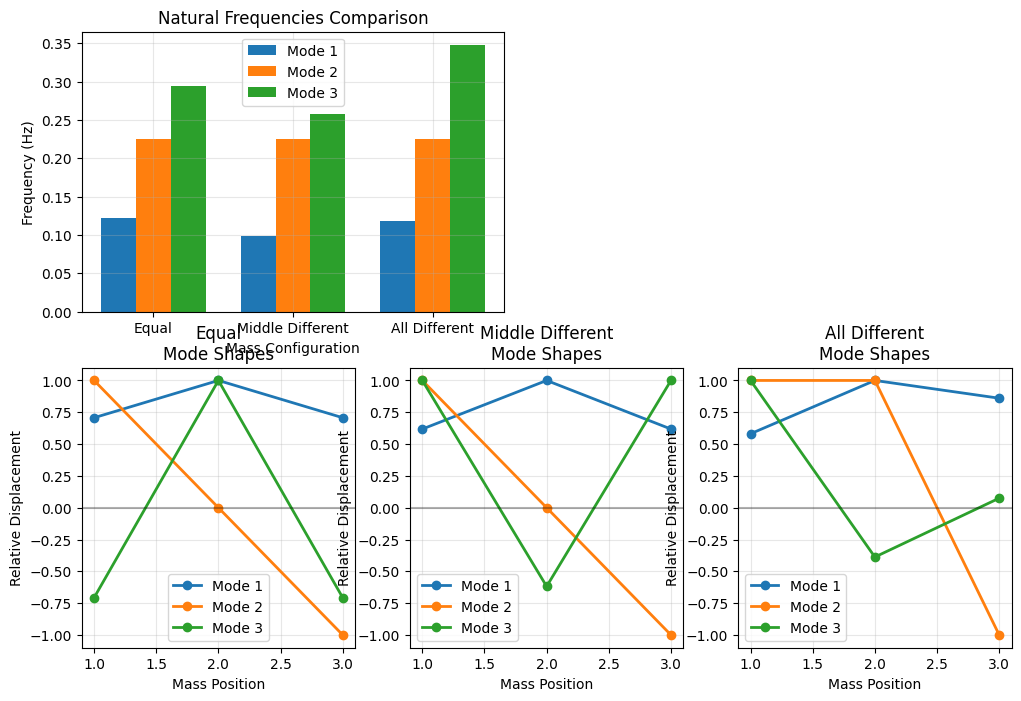


TUTORIAL 3: VARYING SPRING CONSTANTS

3.1 Effect of wall spring stiffness:

Wall springs = 0.5 N/m:
  Mode 1: 0.1125 Hz
  Mode 2: 0.2516 Hz

Wall springs = 1.0 N/m:
  Mode 1: 0.1592 Hz
  Mode 2: 0.2757 Hz

Wall springs = 2.0 N/m:
  Mode 1: 0.2251 Hz
  Mode 2: 0.3183 Hz

Wall springs = 4.0 N/m:
  Mode 1: 0.3183 Hz
  Mode 2: 0.3898 Hz

3.2 Effect of connecting spring stiffness:

Middle spring = 0.5 N/m:
  Mode 1: 0.1592 Hz
  Mode 2: 0.2251 Hz

Middle spring = 1.0 N/m:
  Mode 1: 0.1592 Hz
  Mode 2: 0.2757 Hz

Middle spring = 2.0 N/m:
  Mode 1: 0.1592 Hz
  Mode 2: 0.3559 Hz

Middle spring = 4.0 N/m:
  Mode 1: 0.1592 Hz
  Mode 2: 0.4775 Hz


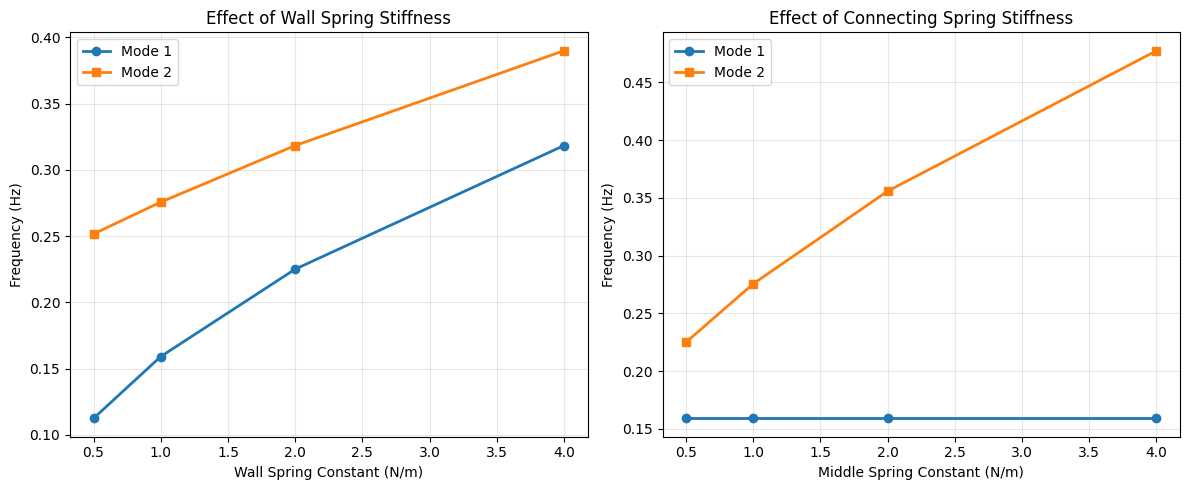


ANALYSIS COMPLETE!
Key observations:
1. Adding mass generally decreases natural frequencies
2. Increasing spring stiffness increases natural frequencies
3. Mass distribution affects mode shapes significantly
4. Wall springs affect all modes, connecting springs affect coupling


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

class MassSpringSystem:
    """
    A class to analyze natural vibration frequencies and normal modes 
    of 1D mass-spring systems with fixed ends.
    """
    
    def __init__(self, masses: List[float], spring_constants: List[float]):
        """
        Initialize the mass-spring system.
        
        Parameters:
        masses: List of masses [m1, m2, ..., mn]
        spring_constants: List of spring constants [k0, k1, k2, ..., kn]
                         where k0 is wall-to-first-mass spring,
                         k1 is first-to-second-mass spring, etc.,
                         and kn is last-mass-to-wall spring
        """
        self.masses = np.array(masses)
        self.spring_constants = np.array(spring_constants)
        self.n_masses = len(masses)
        
        # Validate input
        if len(spring_constants) != len(masses) + 1:
            raise ValueError("Number of springs must be number of masses + 1")
    
    def build_mass_matrix(self) -> np.ndarray:
        """Build the mass matrix M."""
        return np.diag(self.masses)
    
    def build_stiffness_matrix(self) -> np.ndarray:
        """Build the stiffness matrix K."""
        K = np.zeros((self.n_masses, self.n_masses))
        
        # Diagonal elements
        for i in range(self.n_masses):
            if i == 0:  # First mass
                K[i, i] = self.spring_constants[0] + self.spring_constants[1]
            elif i == self.n_masses - 1:  # Last mass
                K[i, i] = self.spring_constants[i] + self.spring_constants[i + 1]
            else:  # Middle masses
                K[i, i] = self.spring_constants[i] + self.spring_constants[i + 1]
        
        # Off-diagonal elements
        for i in range(self.n_masses - 1):
            K[i, i + 1] = -self.spring_constants[i + 1]
            K[i + 1, i] = -self.spring_constants[i + 1]
        
        return K
    
    def solve_eigenvalue_problem(self) -> Tuple[np.ndarray, np.ndarray]:
        """
        Solve the generalized eigenvalue problem K*phi = lambda*M*phi
        
        Returns:
        frequencies: Natural frequencies (rad/s)
        modes: Normal modes (columns are mode shapes)
        """
        M = self.build_mass_matrix()
        K = self.build_stiffness_matrix()
        
        # Solve generalized eigenvalue problem K*phi = lambda*M*phi
        # Convert to standard eigenvalue problem: M^(-1)*K*phi = lambda*phi
        M_inv = np.linalg.inv(M)
        A = M_inv @ K
        eigenvalues, eigenvectors = np.linalg.eig(A)
        
        # Sort by frequency (eigenvalues should be real and positive)
        eigenvalues = np.real(eigenvalues)
        eigenvectors = np.real(eigenvectors)
        idx = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Natural frequencies (rad/s)
        frequencies = np.sqrt(eigenvalues)
        
        # Normalize modes (largest element = 1)
        for i in range(eigenvectors.shape[1]):
            max_idx = np.argmax(np.abs(eigenvectors[:, i]))
            eigenvectors[:, i] = eigenvectors[:, i] / eigenvectors[max_idx, i]
        
        return frequencies, eigenvectors
    
    def analyze_system(self, plot_modes=True) -> dict:
        """
        Complete analysis of the mass-spring system.
        
        Returns:
        Dictionary with frequencies, modes, and system parameters
        """
        frequencies, modes = self.solve_eigenvalue_problem()
        
        results = {
            'masses': self.masses,
            'spring_constants': self.spring_constants,
            'frequencies_rad_s': frequencies,
            'frequencies_hz': frequencies / (2 * np.pi),
            'modes': modes
        }
        
        if plot_modes:
            self.plot_modes(frequencies, modes)
        
        return results
    
    def plot_modes(self, frequencies: np.ndarray, modes: np.ndarray):
        """Plot the normal modes."""
        fig, axes = plt.subplots(1, self.n_masses, figsize=(4*self.n_masses, 4))
        if self.n_masses == 1:
            axes = [axes]
        
        # Position of masses (for visualization)
        positions = np.arange(1, self.n_masses + 1)
        
        for i in range(self.n_masses):
            axes[i].bar(positions, modes[:, i], alpha=0.7, 
                       color=f'C{i}', width=0.6)
            axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
            axes[i].set_title(f'Mode {i+1}\nf = {frequencies[i]/(2*np.pi):.3f} Hz')
            axes[i].set_xlabel('Mass Number')
            axes[i].set_ylabel('Relative Displacement')
            axes[i].grid(True, alpha=0.3)
            axes[i].set_xticks(positions)
        
        plt.tight_layout()
        plt.show()
    
    def print_results(self, results: dict):
        """Print analysis results in a formatted way."""
        print("="*50)
        print("MASS-SPRING SYSTEM ANALYSIS")
        print("="*50)
        print(f"Masses: {results['masses']} kg")
        print(f"Spring constants: {results['spring_constants']} N/m")
        print("\nNATURAL FREQUENCIES:")
        print("-"*30)
        for i, (freq_rad, freq_hz) in enumerate(zip(results['frequencies_rad_s'], 
                                                   results['frequencies_hz'])):
            print(f"Mode {i+1}: {freq_rad:.4f} rad/s ({freq_hz:.4f} Hz)")
        
        print("\nNORMAL MODES (relative displacements):")
        print("-"*40)
        for i in range(len(results['masses'])):
            mode_str = " ".join([f"{x:8.4f}" for x in results['modes'][:, i]])
            print(f"Mode {i+1}: [{mode_str}]")
        print("="*50)

def tutorial_two_masses():
    """Tutorial for two-mass system analysis."""
    print("\n" + "="*60)
    print("TUTORIAL 1: TWO-MASS SYSTEM WITH FIXED ENDS")
    print("="*60)
    
    # Initial system: equal masses and spring constants
    print("\n1.1 Initial system (equal masses and springs):")
    masses = [1.0, 1.0]  # kg
    springs = [1.0, 1.0, 1.0]  # N/m (wall-mass1, mass1-mass2, mass2-wall)
    
    system1 = MassSpringSystem(masses, springs)
    results1 = system1.analyze_system()
    system1.print_results(results1)
    
    # Vary second mass
    print("\n1.2 Varying second mass (m2):")
    m2_values = [0.5, 1.0, 2.0, 4.0]
    freq_comparison = []
    
    for m2 in m2_values:
        masses_var = [1.0, m2]
        system_var = MassSpringSystem(masses_var, springs)
        results_var = system_var.analyze_system(plot_modes=False)
        freq_comparison.append(results_var['frequencies_hz'])
        print(f"\nm2 = {m2} kg:")
        print(f"  Mode 1: {results_var['frequencies_hz'][0]:.4f} Hz")
        print(f"  Mode 2: {results_var['frequencies_hz'][1]:.4f} Hz")
    
    # Plot frequency variation
    plt.figure(figsize=(10, 6))
    freq_array = np.array(freq_comparison)
    plt.subplot(1, 2, 1)
    plt.plot(m2_values, freq_array[:, 0], 'o-', label='Mode 1', linewidth=2)
    plt.plot(m2_values, freq_array[:, 1], 's-', label='Mode 2', linewidth=2)
    plt.xlabel('m2 (kg)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Natural Frequencies vs m2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot example mode shapes for different m2 values
    plt.subplot(1, 2, 2)
    for i, m2 in enumerate([0.5, 2.0]):
        masses_example = [1.0, m2]
        system_example = MassSpringSystem(masses_example, springs)
        _, modes = system_example.solve_eigenvalue_problem()
        positions = [1, 2]
        plt.plot(positions, modes[:, 0], 'o-', 
                label=f'm2={m2} kg, Mode 1', linewidth=2)
    plt.xlabel('Mass Position')
    plt.ylabel('Relative Displacement')
    plt.title('Mode 1 Shape Variation')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def tutorial_three_masses():
    """Tutorial for three-mass system analysis."""
    print("\n" + "="*60)
    print("TUTORIAL 2: THREE-MASS SYSTEM WITH FIXED ENDS")
    print("="*60)
    
    # Case 1: All masses equal
    print("\n2.1 All masses equal:")
    masses_equal = [1.0, 1.0, 1.0]
    springs_equal = [1.0, 1.0, 1.0, 1.0]  # 4 springs for 3 masses
    
    system1 = MassSpringSystem(masses_equal, springs_equal)
    results1 = system1.analyze_system()
    system1.print_results(results1)
    
    # Case 2: Middle mass different
    print("\n2.2 Middle mass different (m2 = 2.0 kg):")
    masses_middle = [1.0, 2.0, 1.0]
    
    system2 = MassSpringSystem(masses_middle, springs_equal)
    results2 = system2.analyze_system()
    system2.print_results(results2)
    
    # Case 3: All masses different
    print("\n2.3 All masses different:")
    masses_different = [0.5, 1.0, 1.5]
    
    system3 = MassSpringSystem(masses_different, springs_equal)
    results3 = system3.analyze_system()
    system3.print_results(results3)
    
    # Comparison plot
    plt.figure(figsize=(12, 8))
    
    # Frequency comparison
    plt.subplot(2, 2, 1)
    cases = ['Equal', 'Middle Different', 'All Different']
    freq_data = [results1['frequencies_hz'], 
                 results2['frequencies_hz'], 
                 results3['frequencies_hz']]
    
    x = np.arange(len(cases))
    width = 0.25
    
    for i in range(3):  # 3 modes
        frequencies = [freq[i] for freq in freq_data]
        plt.bar(x + i*width, frequencies, width, label=f'Mode {i+1}')
    
    plt.xlabel('Mass Configuration')
    plt.ylabel('Frequency (Hz)')
    plt.title('Natural Frequencies Comparison')
    plt.xticks(x + width, cases)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Mode shapes comparison
    positions = [1, 2, 3]
    for i, (result, case) in enumerate(zip([results1, results2, results3], cases)):
        plt.subplot(2, 3, i + 4)
        for mode in range(3):
            plt.plot(positions, result['modes'][:, mode], 'o-', 
                    label=f'Mode {mode+1}', linewidth=2)
        plt.title(f'{case}\nMode Shapes')
        plt.xlabel('Mass Position')
        plt.ylabel('Relative Displacement')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def tutorial_spring_variation():
    """Tutorial for varying spring constants."""
    print("\n" + "="*60)
    print("TUTORIAL 3: VARYING SPRING CONSTANTS")
    print("="*60)
    
    # Fixed masses
    masses = [1.0, 1.0]
    
    print("\n3.1 Effect of wall spring stiffness:")
    # Vary wall springs (k0 and k2), keep middle spring constant
    wall_k_values = [0.5, 1.0, 2.0, 4.0]
    
    for kw in wall_k_values:
        springs = [kw, 1.0, kw]  # wall springs same, middle spring = 1.0
        system = MassSpringSystem(masses, springs)
        results = system.analyze_system(plot_modes=False)
        print(f"\nWall springs = {kw} N/m:")
        print(f"  Mode 1: {results['frequencies_hz'][0]:.4f} Hz")
        print(f"  Mode 2: {results['frequencies_hz'][1]:.4f} Hz")
    
    print("\n3.2 Effect of connecting spring stiffness:")
    # Vary middle spring, keep wall springs constant
    middle_k_values = [0.5, 1.0, 2.0, 4.0]
    
    for km in middle_k_values:
        springs = [1.0, km, 1.0]  # wall springs = 1.0, middle spring varies
        system = MassSpringSystem(masses, springs)
        results = system.analyze_system(plot_modes=False)
        print(f"\nMiddle spring = {km} N/m:")
        print(f"  Mode 1: {results['frequencies_hz'][0]:.4f} Hz")
        print(f"  Mode 2: {results['frequencies_hz'][1]:.4f} Hz")
    
    # Visual comparison
    plt.figure(figsize=(12, 5))
    
    # Wall spring variation
    plt.subplot(1, 2, 1)
    wall_freqs = []
    for kw in wall_k_values:
        springs = [kw, 1.0, kw]
        system = MassSpringSystem(masses, springs)
        results = system.analyze_system(plot_modes=False)
        wall_freqs.append(results['frequencies_hz'])
    
    wall_freqs = np.array(wall_freqs)
    plt.plot(wall_k_values, wall_freqs[:, 0], 'o-', label='Mode 1', linewidth=2)
    plt.plot(wall_k_values, wall_freqs[:, 1], 's-', label='Mode 2', linewidth=2)
    plt.xlabel('Wall Spring Constant (N/m)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Effect of Wall Spring Stiffness')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Middle spring variation
    plt.subplot(1, 2, 2)
    middle_freqs = []
    for km in middle_k_values:
        springs = [1.0, km, 1.0]
        system = MassSpringSystem(masses, springs)
        results = system.analyze_system(plot_modes=False)
        middle_freqs.append(results['frequencies_hz'])
    
    middle_freqs = np.array(middle_freqs)
    plt.plot(middle_k_values, middle_freqs[:, 0], 'o-', label='Mode 1', linewidth=2)
    plt.plot(middle_k_values, middle_freqs[:, 1], 's-', label='Mode 2', linewidth=2)
    plt.xlabel('Middle Spring Constant (N/m)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Effect of Connecting Spring Stiffness')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def main():
    """Main function to run all tutorials."""
    print("MASS-SPRING SYSTEM VIBRATION ANALYSIS")
    print("="*60)
    print("This program analyzes natural frequencies and normal modes")
    print("of 1D mass-spring systems with fixed ends.")
    print("="*60)
    
    # Run tutorials
    tutorial_two_masses()
    tutorial_three_masses()
    tutorial_spring_variation()
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE!")
    print("="*60)
    print("Key observations:")
    print("1. Adding mass generally decreases natural frequencies")
    print("2. Increasing spring stiffness increases natural frequencies")
    print("3. Mass distribution affects mode shapes significantly")
    print("4. Wall springs affect all modes, connecting springs affect coupling")

if __name__ == "__main__":
    main()


==================== Part 1: Two-Mass System ====================

--- 1a. Initial Case: m1=m2=1, k=1 ---
Mass Matrix (M):
 [[1. 0.]
 [0. 1.]]
Stiffness Matrix (K):
 [[ 2. -1.]
 [-1.  2.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 1.0000
  w_2 = 1.7321

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1. 1.]
  Mode 2 (for w_2): [ 1. -1.]
--------------------------------------------------


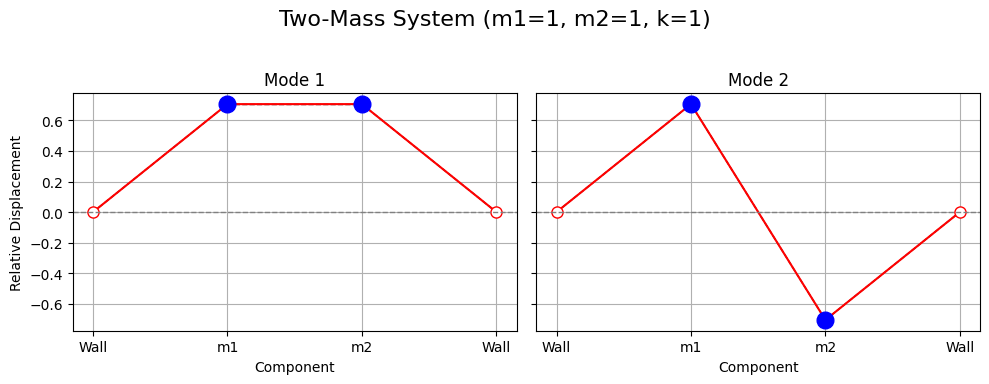


--- 1b. Varying m2 (m1=1, k=1) ---

Analysis for m2 = 0.5 kg
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 1.1260
  w_2 = 2.1753

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     0.7321]
  Mode 2 (for w_2): [ 1.     -2.7321]
--------------------------------------------------


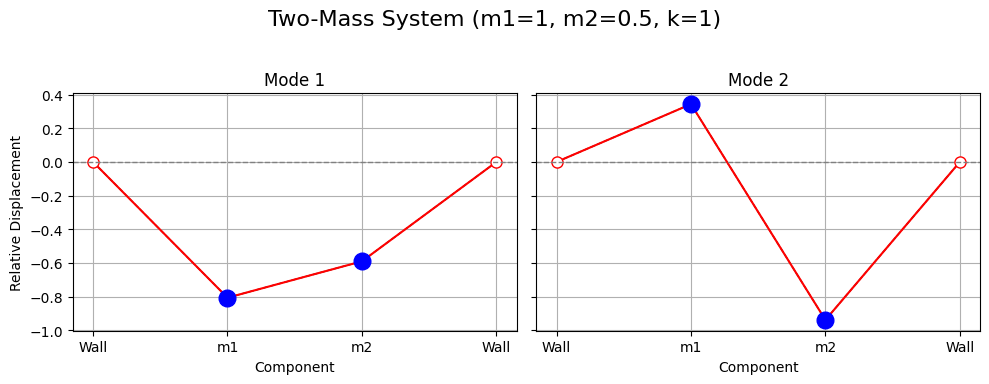


Analysis for m2 = 1.0 kg
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 1.0000
  w_2 = 1.7321

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1. 1.]
  Mode 2 (for w_2): [ 1. -1.]
--------------------------------------------------


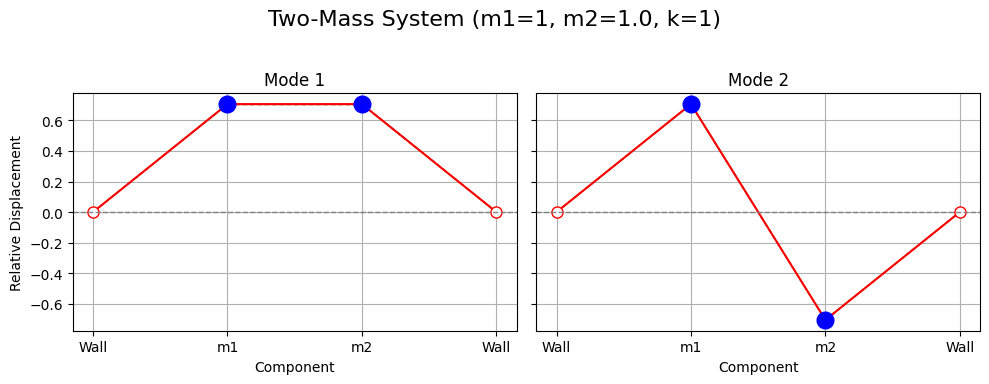


Analysis for m2 = 2.0 kg
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.7962
  w_2 = 1.5382

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.    1.366]
  Mode 2 (for w_2): [ 1.    -0.366]
--------------------------------------------------


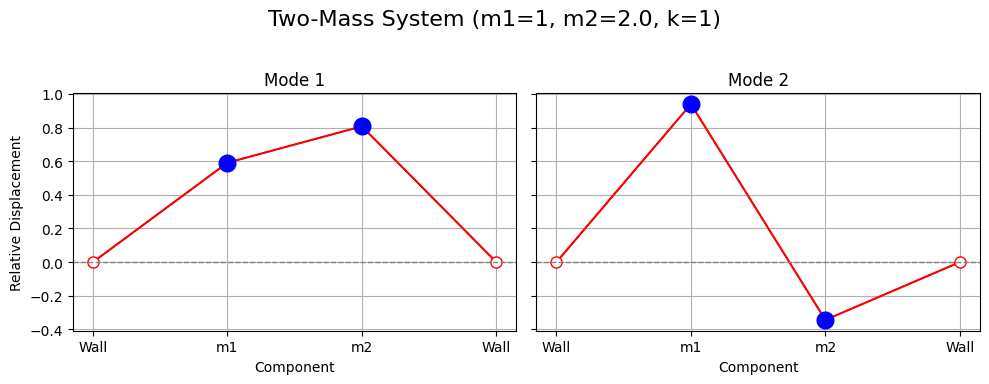


Analysis for m2 = 5.0 kg
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.5324
  w_2 = 1.4548

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.7165]
  Mode 2 (for w_2): [ 1.     -0.1165]
--------------------------------------------------


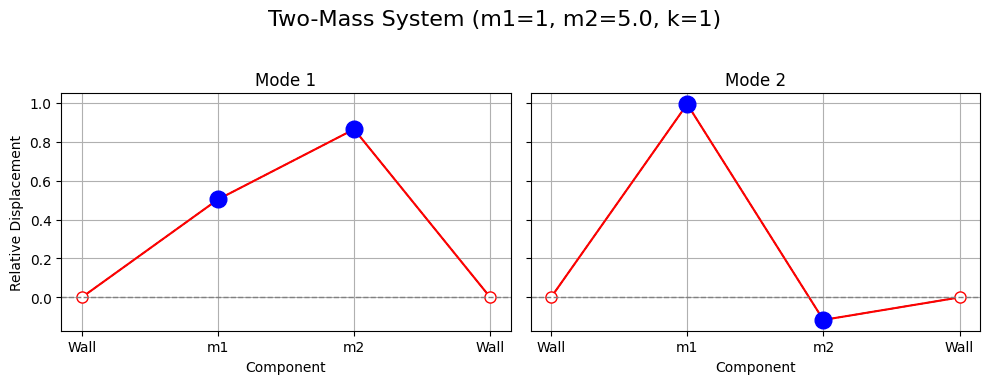

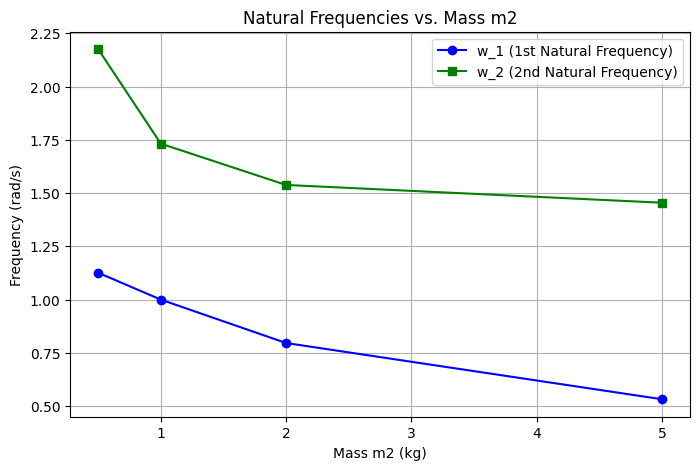


==================== Part 2: Three-Mass System ====================
Stiffness Matrix (K) for 3-mass system (k=1):
 [[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]

--- Analysis for: All Masses Equal (m=1) ---
Mass Matrix (M):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.7654
  w_2 = 1.4142
  w_3 = 1.8478

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.4142 1.    ]
  Mode 2 (for w_2): [ 1. -0. -1.]
  Mode 3 (for w_3): [ 1.     -1.4142  1.    ]
--------------------------------------------------


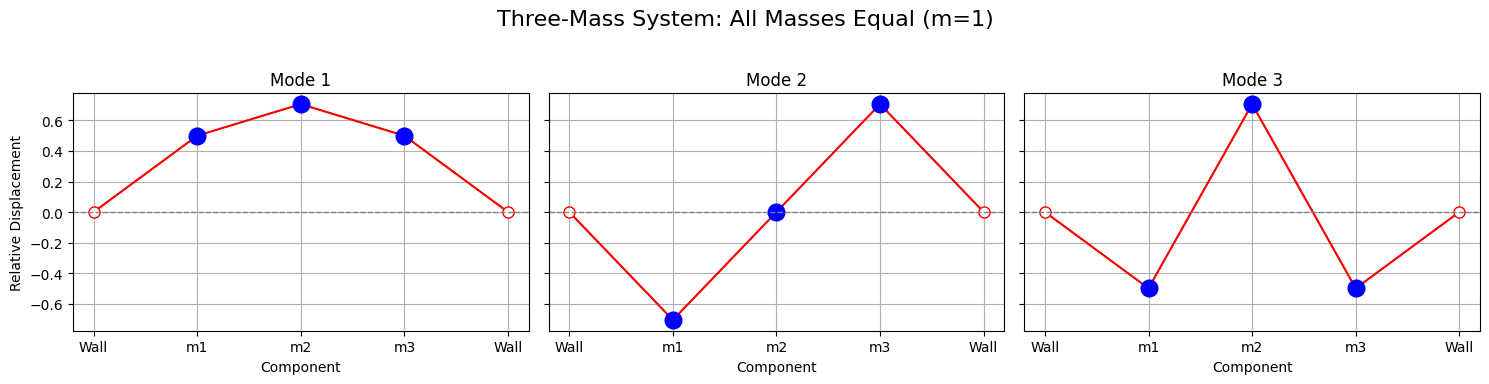


--- Analysis for: Middle Mass Heavy (m2=5) ---
Mass Matrix (M):
 [[1. 0. 0.]
 [0. 5. 0.]
 [0. 0. 1.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.4245
  w_2 = 1.4142
  w_3 = 1.4899

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.8198 1.    ]
  Mode 2 (for w_2): [ 1. -0. -1.]
  Mode 3 (for w_3): [ 1.     -0.2198  1.    ]
--------------------------------------------------


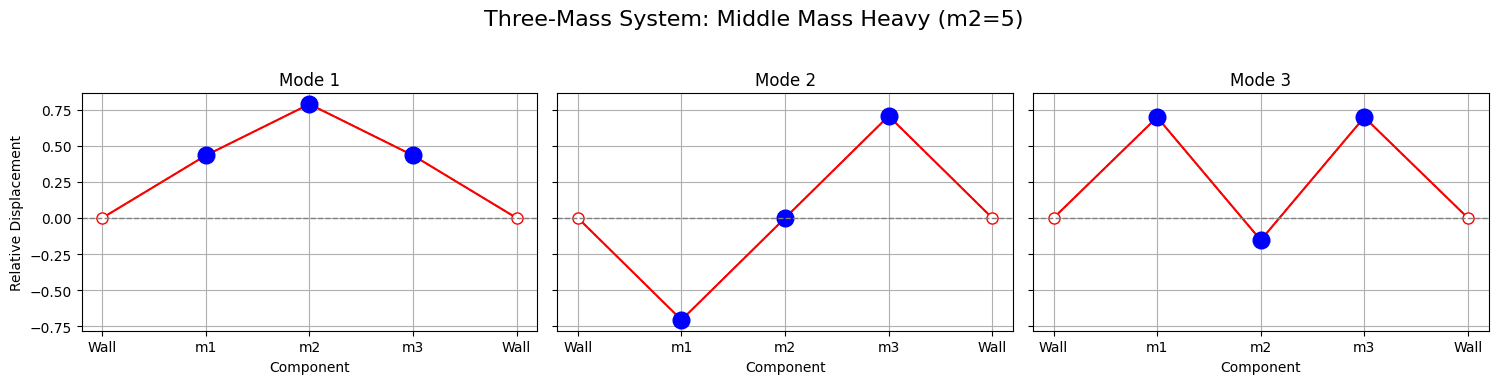


--- Analysis for: End Mass Heavy (m3=5) ---
Mass Matrix (M):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 5.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.4831
  w_2 = 1.0621
  w_3 = 1.7432

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.7666 2.1209]
  Mode 2 (for w_2): [ 1.      0.872  -0.2396]
  Mode 3 (for w_3): [ 1.     -1.0386  0.0787]
--------------------------------------------------


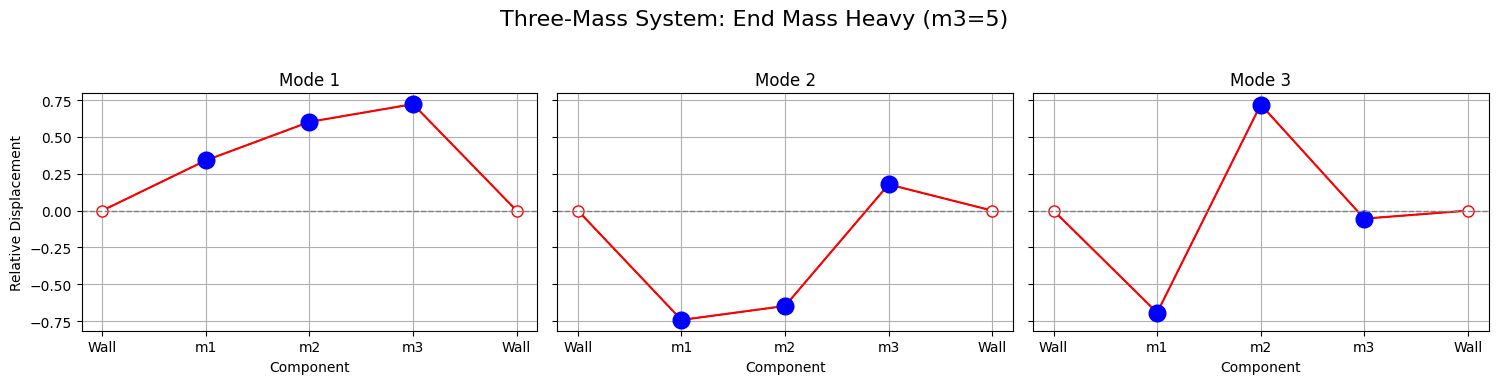


--- Analysis for: All Masses Different ---
Mass Matrix (M):
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.5284
  w_2 = 1.0000
  w_3 = 1.5451

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.7208 1.4805]
  Mode 2 (for w_2): [ 1.  1. -1.]
  Mode 3 (for w_3): [ 1.     -0.3874  0.075 ]
--------------------------------------------------


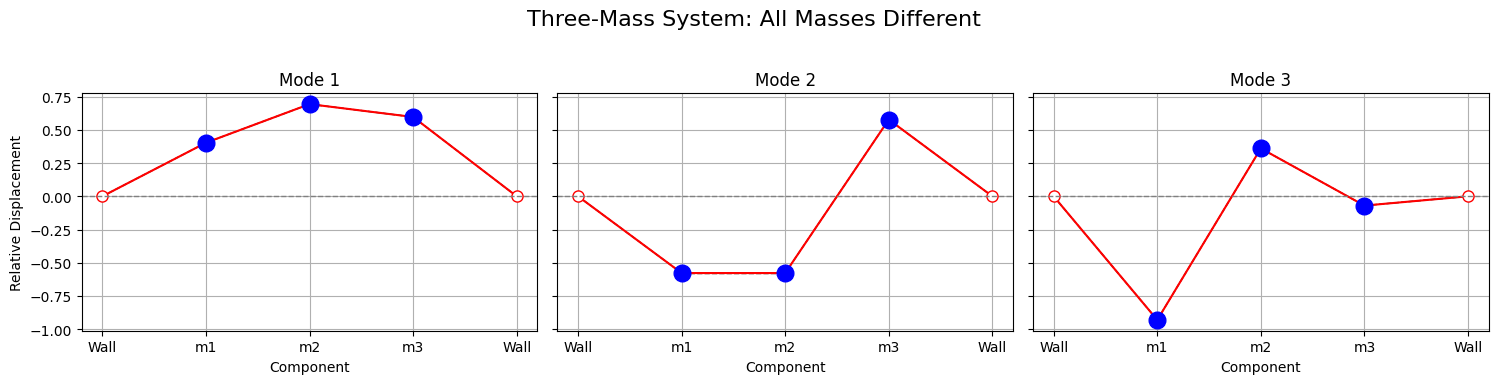


================== Part 3: Varying Spring Constants ==================
Using fixed masses: [1.0, 1.0, 1.0]

--- Analysis for: All Springs Equal (k=1) ---
Stiffness Matrix (K):
 [[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.7654
  w_2 = 1.4142
  w_3 = 1.8478

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.4142 1.    ]
  Mode 2 (for w_2): [ 1. -0. -1.]
  Mode 3 (for w_3): [ 1.     -1.4142  1.    ]
--------------------------------------------------


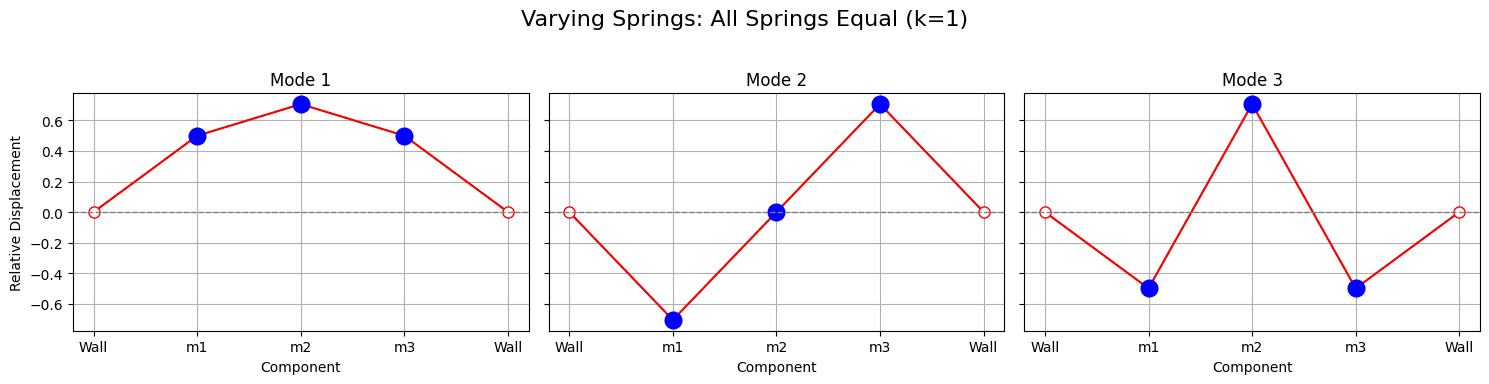


--- Analysis for: Stiff Wall Springs (k_wall=5) ---
Stiffness Matrix (K):
 [[ 6. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  6.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 1.2452
  w_2 = 2.4495
  w_3 = 2.5396

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     4.4495 1.    ]
  Mode 2 (for w_2): [ 1. -0. -1.]
  Mode 3 (for w_3): [ 1.     -0.4495  1.    ]
--------------------------------------------------


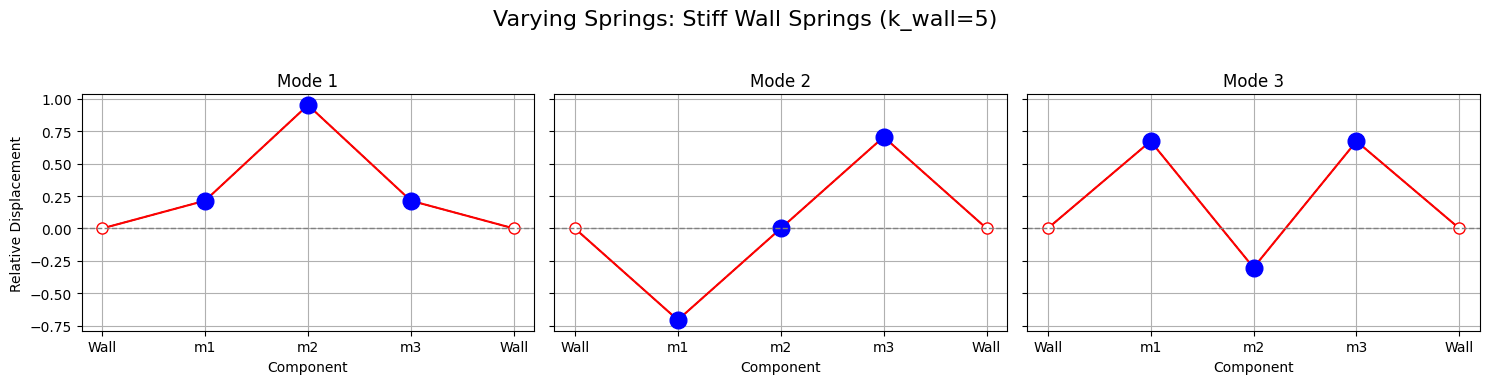


--- Analysis for: Soft Wall Springs (k_wall=0.2) ---
Stiffness Matrix (K):
 [[ 1.2 -1.   0. ]
 [-1.   2.  -1. ]
 [ 0.  -1.   1.2]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.3610
  w_2 = 1.0954
  w_3 = 1.7521

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.0697 1.    ]
  Mode 2 (for w_2): [ 1.  0. -1.]
  Mode 3 (for w_3): [ 1.     -1.8697  1.    ]
--------------------------------------------------


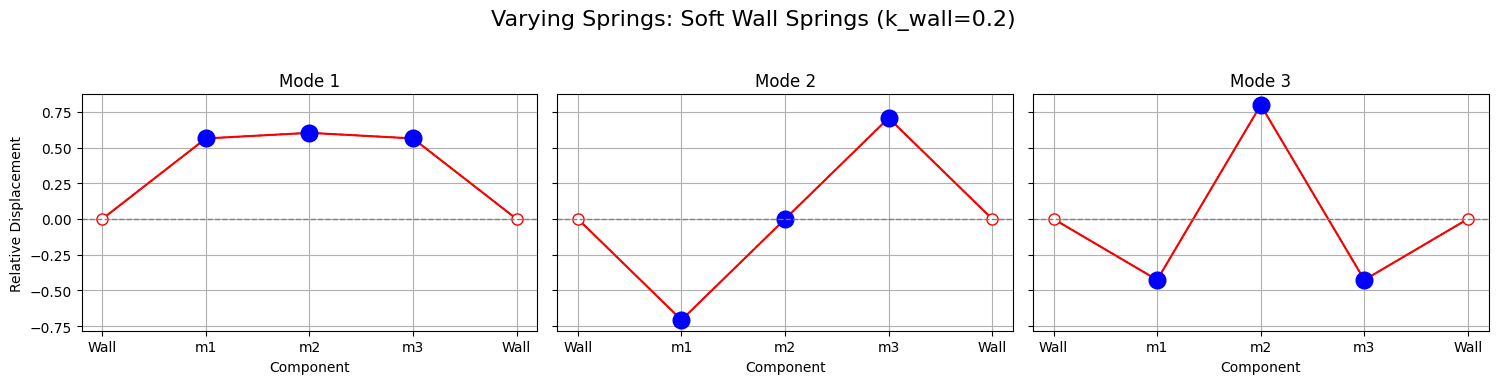


--- Analysis for: Stiff Middle Spring (k_int=5) ---
Stiffness Matrix (K):
 [[ 6. -5.  0.]
 [-5.  6. -1.]
 [ 0. -1.  2.]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.7897
  w_2 = 1.5235
  w_3 = 3.3250

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     1.0753 0.7812]
  Mode 2 (for w_2): [ 1.      0.7358 -2.2929]
  Mode 3 (for w_3): [ 1.     -1.0111  0.1117]
--------------------------------------------------


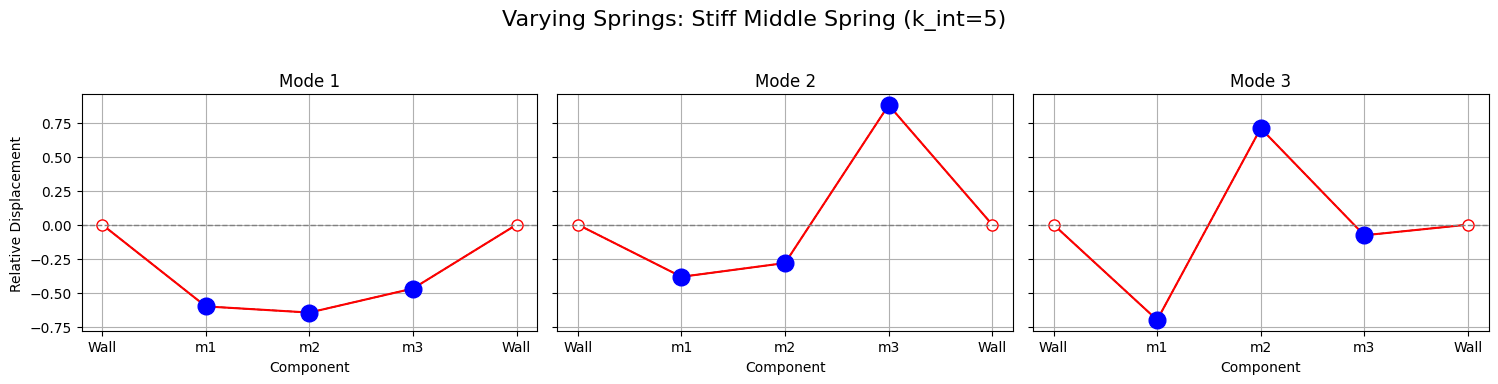


--- Analysis for: Asymmetric Springs ---
Stiffness Matrix (K):
 [[ 6.  -1.   0. ]
 [-1.   3.  -2. ]
 [ 0.  -2.   2.5]]
--------------------------------------------------
Natural Frequencies (rad/s):
  w_1 = 0.8065
  w_2 = 2.1053
  w_3 = 2.5332

Normal Modes (relative displacements):
  Mode 1 (for w_1): [1.     5.3496 5.7846]
  Mode 2 (for w_2): [ 1.      1.5677 -1.6227]
  Mode 3 (for w_3): [ 1.     -0.4173  0.2131]
--------------------------------------------------


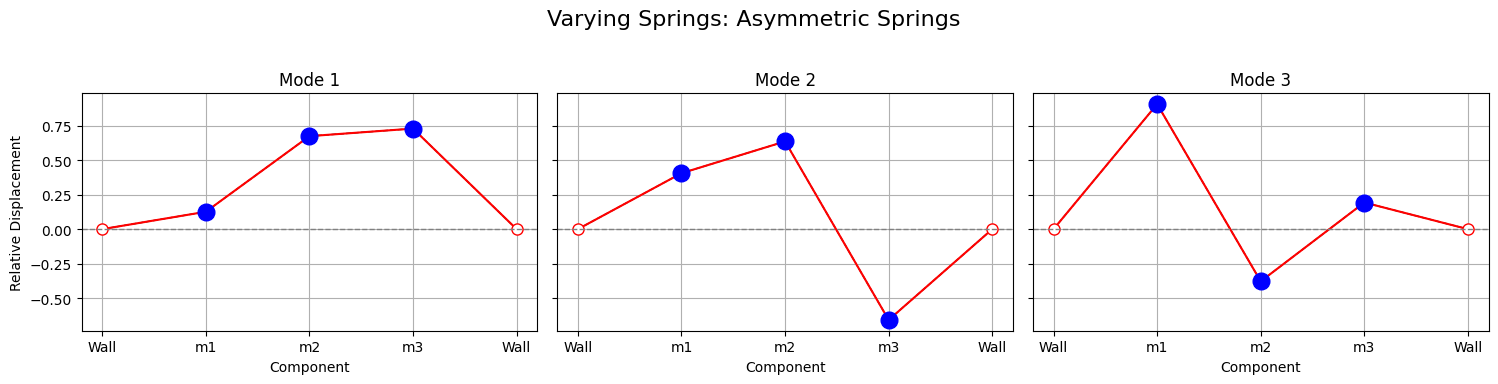

In [3]:
"""
Vibration Analysis of 1D Mass-Spring Systems

This script provides a step-by-step tutorial for calculating the natural
vibration frequencies and normal modes of one-dimensional mass-spring systems
with fixed ends.

It covers:
1. A system with two masses.
2. An extension to three masses.
3. Analysis of varying masses and spring constants.

Required library:
- numpy: For numerical operations, especially linear algebra.
"""

import numpy as np
import matplotlib.pyplot as plt

# --- Helper Function to Print Results ---
def print_results(w_squared, modes, mass_label="m"):
    """
    Prints the calculated natural frequencies and normal modes in a formatted way.
    """
    print("-" * 50)
    # Eigenvalues (w^2) are sorted for consistent interpretation
    # The corresponding eigenvectors (modes) are sorted along with them
    sorted_indices = np.argsort(w_squared)
    w_squared_sorted = w_squared[sorted_indices]
    modes_sorted = modes[:, sorted_indices]

    # Calculate frequencies in Hz (w = sqrt(w^2))
    frequencies = np.sqrt(w_squared_sorted)

    print("Natural Frequencies (rad/s):")
    for i, freq in enumerate(frequencies):
        print(f"  w_{i+1} = {freq:.4f}")

    print("\nNormal Modes (relative displacements):")
    for i in range(modes_sorted.shape[1]):
        # Normalize the mode for easier interpretation (e.g., first mass displacement = 1)
        mode = modes_sorted[:, i]
        # Avoid division by zero if the first element is close to zero
        if np.abs(mode[0]) > 1e-9:
            mode = mode / mode[0]
        print(f"  Mode {i+1} (for w_{i+1}): {np.round(mode, 4)}")
    print("-" * 50)
    return frequencies, modes_sorted

# --- Visualization Function ---
def plot_modes(modes, masses, title="Normal Modes"):
    """
    Visualizes the normal modes of the system.
    """
    num_modes = modes.shape[1]
    num_masses = len(masses)
    
    fig, axes = plt.subplots(1, num_modes, figsize=(5 * num_modes, 4), sharey=True)
    fig.suptitle(title, fontsize=16)

    for i in range(num_modes):
        ax = axes[i] if num_modes > 1 else axes
        mode = modes[:, i]
        
        # Positions of masses at rest (equilibrium)
        x_eq = np.arange(1, num_masses + 1)
        
        # Displacements for visualization
        displacements = np.concatenate(([0], mode, [0])) # Add walls at x=0 and x=num_masses+1
        x_pos = np.arange(0, num_masses + 2)
        
        ax.plot(x_pos, displacements, 'r-o', markerfacecolor='w', markersize=8, label='Displacement Shape')
        ax.plot(x_eq, mode, 'bo', markersize=12, label='Masses')
        
        # Draw springs
        for j in range(len(x_pos) - 1):
            ax.plot([x_pos[j], x_pos[j+1]], [displacements[j], displacements[j+1]], 'k--', lw=1, zorder=0)

        ax.axhline(0, color='gray', linestyle='--', lw=1)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(['Wall'] + [f'm{k+1}' for k in range(num_masses)] + ['Wall'])
        ax.set_title(f'Mode {i+1}')
        ax.set_xlabel('Component')
        if i == 0:
            ax.set_ylabel('Relative Displacement')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Part 1: System with Two Masses and Fixed Ends ---
def analyze_two_mass_system():
    """
    Models and analyzes a 2-mass, 3-spring system.
    """
    print("\n" + "="*20 + " Part 1: Two-Mass System " + "="*20)

    # --- 1a. Initial Case: Equal Masses and Springs ---
    print("\n--- 1a. Initial Case: m1=m2=1, k=1 ---")
    m1, m2 = 1.0, 1.0
    k = 1.0  # k1=k2=k3=k

    # Mass Matrix (M)
    M = np.diag([m1, m2])

    # Stiffness Matrix (K)
    # K[i,j] is the force on mass i due to a unit displacement of mass j
    K = np.array([[2*k, -k],
                  [-k,  2*k]])

    print("Mass Matrix (M):\n", M)
    print("Stiffness Matrix (K):\n", K)

    # Solve the generalized eigenvalue problem: K*v = lambda*M*v
    # where lambda = w^2 (omega squared)
    w_squared, modes = np.linalg.eig(np.linalg.inv(M) @ K)
    
    freqs, sorted_modes = print_results(w_squared, modes)
    plot_modes(sorted_modes, [m1, m2], title="Two-Mass System (m1=1, m2=1, k=1)")

    # --- 1b. Varying Mass m2 ---
    print("\n--- 1b. Varying m2 (m1=1, k=1) ---")
    m1_fixed = 1.0
    m2_values = [0.5, 1.0, 2.0, 5.0]
    
    all_freqs = []

    for m2_var in m2_values:
        print(f"\nAnalysis for m2 = {m2_var} kg")
        M_var = np.diag([m1_fixed, m2_var])
        w_sq_var, modes_var = np.linalg.eig(np.linalg.inv(M_var) @ K)
        
        freqs_var, sorted_modes_var = print_results(w_sq_var, modes_var)
        all_freqs.append(freqs_var)
        plot_modes(sorted_modes_var, [m1_fixed, m2_var], title=f"Two-Mass System (m1=1, m2={m2_var}, k=1)")

    # Plot how frequencies change with m2
    all_freqs = np.array(all_freqs)
    plt.figure(figsize=(8, 5))
    plt.plot(m2_values, all_freqs[:, 0], 'b-o', label='w_1 (1st Natural Frequency)')
    plt.plot(m2_values, all_freqs[:, 1], 'g-s', label='w_2 (2nd Natural Frequency)')
    plt.title('Natural Frequencies vs. Mass m2')
    plt.xlabel('Mass m2 (kg)')
    plt.ylabel('Frequency (rad/s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Part 2: Extension to Three Masses ---
def analyze_three_mass_system():
    """
    Models and analyzes a 3-mass, 4-spring system.
    """
    print("\n" + "="*20 + " Part 2: Three-Mass System " + "="*20)
    
    # Let all spring constants be k=1 for this part
    k = 1.0
    K = np.array([[2*k, -k, 0],
                  [-k, 2*k, -k],
                  [0, -k, 2*k]])
    
    print("Stiffness Matrix (K) for 3-mass system (k=1):\n", K)

    # --- 2a. Different Mass Distributions ---
    mass_configs = {
        "All Masses Equal (m=1)": [1.0, 1.0, 1.0],
        "Middle Mass Heavy (m2=5)": [1.0, 5.0, 1.0],
        "End Mass Heavy (m3=5)": [1.0, 1.0, 5.0],
        "All Masses Different": [1.0, 2.0, 3.0]
    }

    for title, masses in mass_configs.items():
        print(f"\n--- Analysis for: {title} ---")
        M = np.diag(masses)
        print("Mass Matrix (M):\n", M)
        
        w_sq, modes = np.linalg.eig(np.linalg.inv(M) @ K)
        
        _, sorted_modes = print_results(w_sq, modes)
        plot_modes(sorted_modes, masses, title=f"Three-Mass System: {title}")

# --- Part 3: Varying Spring Constants ---
def analyze_varying_springs():
    """
    Analyzes a 3-mass system with varying spring constants.
    """
    print("\n" + "="*18 + " Part 3: Varying Spring Constants " + "="*18)
    
    # Use equal masses for this part
    masses = [1.0, 1.0, 1.0]
    M = np.diag(masses)
    print(f"Using fixed masses: {masses}")

    # k_wall_left, k_internal_1, k_internal_2, k_wall_right
    spring_configs = {
        "All Springs Equal (k=1)": [1.0, 1.0, 1.0, 1.0],
        "Stiff Wall Springs (k_wall=5)": [5.0, 1.0, 1.0, 5.0],
        "Soft Wall Springs (k_wall=0.2)": [0.2, 1.0, 1.0, 0.2],
        "Stiff Middle Spring (k_int=5)": [1.0, 5.0, 1.0, 1.0],
        "Asymmetric Springs": [5.0, 1.0, 2.0, 0.5]
    }

    for title, k_vals in spring_configs.items():
        print(f"\n--- Analysis for: {title} ---")
        k1, k2, k3, k4 = k_vals
        
        # Construct the stiffness matrix based on the given constants
        K_var = np.array([[k1 + k2, -k2, 0],
                          [-k2, k2 + k3, -k3],
                          [0, -k3, k3 + k4]])
        
        print("Stiffness Matrix (K):\n", K_var)
        
        w_sq, modes = np.linalg.eig(np.linalg.inv(M) @ K_var)
        
        _, sorted_modes = print_results(w_sq, modes)
        plot_modes(sorted_modes, masses, title=f"Varying Springs: {title}")


# --- Main Execution ---
if __name__ == "__main__":
    analyze_two_mass_system()
    analyze_three_mass_system()
    analyze_varying_springs()